# Regularization

## a) Lasso Regression

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
X_train = train['Feature']
y_train = np.array(train[' Label'])
X_test = test['Feature']
y_test = np.array(test[' Label'])

In [4]:
def hypothesis_function(x_temp, theta):
    h = np.matmul(x_temp, theta)
    return h

def cost_function(x_train, y_train, theta, k, lambda_):
    m = len(y_train)
    h = hypothesis_function(x_train, theta)
    grad_cost = np.array([np.sum((h - y_train) * x_train[:, i])*(1/m) for i in range(k+1)]) + np.array(np.sum(lambda_ * 1 / (2*m)))
    return grad_cost

def gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_):
    for _ in range(N):
        grad_cost = cost_function(x_train, y_train, theta, k, lambda_)
        temp = alpha * grad_cost
        theta = theta - temp
    return theta

def predict_train(x_train, y_train, alpha, N, k, lambda_): 
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_)
    y_train_predicted = hypothesis_function(x_train, theta)
    return y_train_predicted

def predict_test(X_train, y_train, X_test, alpha, N, k, lambda_):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta_trained = gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_)
    y_test_pred = hypothesis_function(x_test, theta_trained)
    return y_test_pred

def squared_error(X_train, X_test, y_train, y_test, alpha, N, k, lambda_):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_)
    h_train = hypothesis_function(x_train, theta)
    m_train = len(y_train)
    J_train = ((1/(2*m_train)) * ((np.sum((h_train - y_train)**2)) + np.sum(lambda_ * theta)))
    h_test = hypothesis_function(x_test, theta)
    m_test = len(y_test)
    J_test = ((1/(2*m_test)) * ((np.sum((h_test - y_test)**2)) + np.sum(lambda_ * theta)))
    return (J_train, J_test)

def plot_train(X_train, y_train, alpha, N, k, lambda_):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    plt.scatter(X_train, y_train)
    plt.scatter(X_train, predict_train(x_train, y_train, alpha, N, k, lambda_))
    
def plot_test(X_train, y_train, X_test, y_test, alpha, N, k, lambda_):    
    plt.scatter(X_test, y_test)
    y_pred = predict_test(X_train, y_train, X_test, alpha, N, k, lambda_)
    plt.scatter(X_test, y_pred)

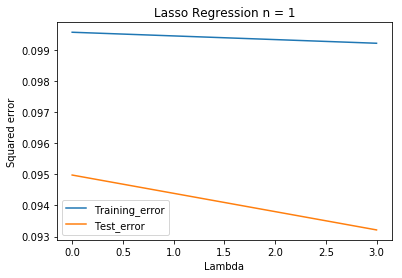

In [5]:
error_train = []
error_test = []
for l in [0.25, 0.50, 0.75, 1]:
    J = squared_error(X_train, X_test, y_train, y_test, 0.05, 10000, 1, l)
    error_train.append(J[0])
    error_test.append(J[1])
plt.plot(error_train, label = 'Training_error')
plt.plot(error_test, label = 'Test_error')
plt.xlabel('Lambda')
plt.ylabel('Squared error')
plt.legend()
plt.title('Lasso Regression n = 1')

In [6]:
sum(error_train)/len(error_train)

0.09938465218537118

In [7]:
sum(error_test)/len(error_test)

0.09409717755234394

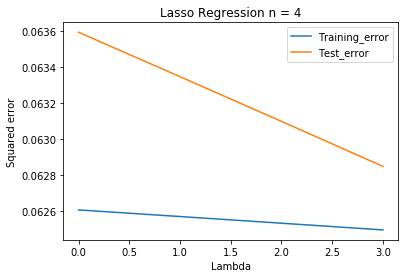

In [8]:
error_train = []
error_test = []
for l in [0.25, 0.50, 0.75, 1]:
    J = squared_error(X_train, X_test, y_train, y_test, 0.05, 10000, 4, l)
    error_train.append(J[0])
    error_test.append(J[1])
plt.plot(error_train, label = 'Training_error')
plt.plot(error_test, label = 'Test_error')
plt.xlabel('Lambda')
plt.ylabel('Squared error')
plt.legend()
plt.title('Lasso Regression n = 4')

In [9]:
sum(error_train)/len(error_train)

0.06254946876428351

In [10]:
sum(error_test)/len(error_test)

0.0632210913690016

## Ridge Regression 

In [11]:
def hypothesis_function(x_temp, theta):
    h = np.matmul(x_temp, theta)
    return h

def cost_function(x_train, y_train, theta, k, lambda_):
    m = len(y_train)
    h = hypothesis_function(x_train, theta)
    grad_cost = np.array([np.sum((h - y_train) * x_train[:, i])*(1/m) for i in range(k+1)]) + np.array(np.sum(lambda_ * theta / m))
    return grad_cost

def gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_):
    for _ in range(N):
        grad_cost = cost_function(x_train, y_train, theta, k, lambda_)
        temp = alpha * grad_cost
        theta = theta - temp
    return theta

def predict_train(x_train, y_train, alpha, N, k, lambda_): 
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_)
    y_train_predicted = hypothesis_function(x_train, theta)
    return y_train_predicted

def predict_test(X_train, y_train, X_test, alpha, N, k, lambda_):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta_trained = gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_)
    y_test_pred = hypothesis_function(x_test, theta_trained)
    return y_test_pred

def squared_error(X_train, X_test, y_train, y_test, alpha, N, k, lambda_):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k, lambda_)
    h_train = hypothesis_function(x_train, theta)
    m_train = len(y_train)
    J_train = ((1/(2*m_train)) * ((np.sum((h_train - y_train)**2)) + np.sum(lambda_ * (theta**2))))
    h_test = hypothesis_function(x_test, theta)
    m_test = len(y_test)
    J_test = ((1/(2*m_test)) * ((np.sum((h_test - y_test)**2)) + np.sum(lambda_ * (theta**2))))
    return (J_train, J_test)

def plot_train(X_train, y_train, alpha, N, k, lambda_):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    plt.scatter(X_train, y_train)
    plt.scatter(X_train, predict_train(x_train, y_train, alpha, N, k, lambda_))
    
def plot_test(X_train, y_train, X_test, y_test, alpha, N, k, lambda_):    
    plt.scatter(X_test, y_test)
    y_pred = predict_test(X_train, y_train, X_test, alpha, N, k, lambda_)
    plt.scatter(X_test, y_pred)

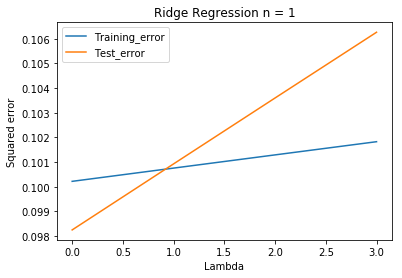

In [12]:
error_train = []
error_test = []
for l in [0.25, 0.50, 0.75, 1]:
    J = squared_error(X_train, X_test, y_train, y_test, 0.05, 10000, 1, l)
    error_train.append(J[0])
    error_test.append(J[1])
plt.plot(error_train, label = 'Training_error')
plt.plot(error_test, label = 'Test_error')
plt.xlabel('Lambda')
plt.ylabel('Squared error')
plt.legend()
plt.title('Ridge Regression n = 1')

In [13]:
sum(error_train)/len(error_train)

0.10102082566168002

In [14]:
sum(error_test)/len(error_test)

0.10225738353566469

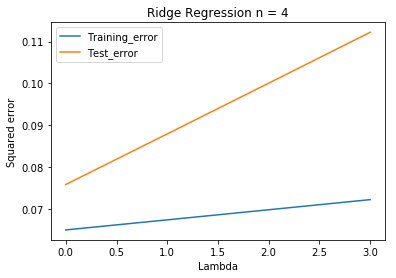

In [15]:
error_train = []
error_test = []
for l in [0.25, 0.50, 0.75, 1]:
    J = squared_error(X_train, X_test, y_train, y_test, 0.05, 10000, 4, l)
    error_train.append(J[0])
    error_test.append(J[1])
plt.plot(error_train, label = 'Training_error')
plt.plot(error_test, label = 'Test_error')
plt.xlabel('Lambda')
plt.ylabel('Squared error')
plt.legend()
plt.title('Ridge Regression n = 4')

In [16]:
sum(error_train)/len(error_train)

0.06864842822885125

In [17]:
sum(error_test)/len(error_test)

0.0940365446047548

## Difference between Lasso and Ridge Regression

### In Lasso Regression as the value of Lambda increases, both the training and test error decreases, whereas in Ridge Regression, both the training and testing error increases with increase in the value of Lambda.

## Preference between the two

#### Lasso Regression  :         
#### n = 1     Training Error :   0.993      Testing Error : 0.941
#### Ridge Regression:
#### n = 1 Training Error : 0.101  Testing Error : 0.102
#### Lasso Regression  :         
####                                             n = 4      Training Error : 0.0625 Testing Error: 0.0632
#### Ridge Regression:
#### n = 4 Training Error : 0.068 Testing Error : 0.090


### In this problem, I would prefer Lasso Regression as in the Lasso Regression the avg. error in training and testing both are less than those for Ridge Regression for both the values of n.

#######################################################################################################################